In [51]:
import torch
import os

In [121]:
!pwd

/root/autodl-tmp/gPINNs/script/diffusion reaction/result/loss/diffusion reaction


In [52]:
import matplotlib.pyplot as plt
import torch
from matplotlib.pyplot import MultipleLocator
import numpy as np

In [122]:
def plot_l2_loss(x, y_nn1, y_nn2, y_gnn11, y_gnn12, y_gnn011, y_gnn012, y_gnn0011, y_gnn0012, xlabel, ylabel, savedir):
    plt.clf()
    plt.rcParams.update({"font.size": 24})
    plt.figure(4, (20, 15), dpi=120)
    x_major_locator=MultipleLocator(25)
    ax=plt.gca()
    
    plt.fill_between(x, y_nn1, y_nn2,  alpha=.5, linewidth=0, color='dimgray')
    plt.fill_between(x, y_gnn11, y_gnn12,  alpha=.5, linewidth=0, color='navajowhite')
    plt.fill_between(x, y_gnn011, y_gnn012,  alpha=.5, linewidth=0, color='red')
    plt.fill_between(x, y_gnn0011, y_gnn0012,  alpha=.5, linewidth=0, color='cornflowerblue')
    
    y1 = [(y_nn1[i]+y_nn2[i])/2 for i in range(min(len(y_nn1),len(y_nn2)))]
    y2 = [(y_gnn11[i]+y_gnn12[i])/2 for i in range(min(len(y_gnn11),len(y_gnn12)))]
    y3 = [(y_gnn011[i]+y_gnn012[i])/2 for i in range(min(len(y_gnn011),len(y_gnn012)))]
    y4 = [(y_gnn0011[i]+y_gnn0012[i])/2 for i in range(min(len(y_gnn0011),len(y_gnn0012)))]
    
    plt.plot(x, y_nn1, color='darkgray')
    plt.plot(x, y1, 'o-', color='black', label='PINN')
    plt.plot(x, y_nn2, color='darkgray')
    
    plt.plot(x, y_gnn11, color='wheat')
    plt.plot(x, y2, 's-', color='gold', label='gPINN, w=1')
    plt.plot(x, y_gnn12, color='wheat')
    
    plt.plot(x, y_gnn011, color='tomato')
    plt.plot(x, y3, '^-', color='red', label='gPINN, w=0.1')
    plt.plot(x, y_gnn012, color='tomato')
    
    plt.plot(x, y_gnn0011, color='royalblue')
    plt.plot(x, y4, 'D-', color='blue', label='gPINN, w=0.01')
    plt.plot(x, y_gnn0012, color='royalblue')
    
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    
    plt.yscale('log') 
    plt.legend(frameon=False)
    plt.savefig(savedir, bbox_inches = 'tight', dpi = 120)

In [62]:
# pinn
l2_u_pinn_1 = torch.load('./l2_u-pinn-2')
l2_u_pinn_2 = torch.load('./l2_u-pinn-3')

l2_dx_pinn_1 = torch.load('./l2_dx-pinn-2')
l2_dx_pinn_2 = torch.load('./l2_dx-pinn-3')

l2_dt_pinn_1 = torch.load('./l2_dt-pinn-2')
l2_dt_pinn_2 = torch.load('./l2_dt-pinn-3')

pde_loss_pinn_1 = torch.load('./pde_res-pinn-2')
pde_loss_pinn_2 = torch.load('./pde_res-pinn-3')

In [65]:
# w = 1
l2_u_gpinn1_1 = torch.load('./l2_u-gpinn-w_1.0-3')
l2_u_gpinn1_2 = torch.load('./l2_u-gpinn-w_1.0-4')

l2_dx_gpinn1_1 = torch.load('./l2_dx-gpinn-w_1.0-3')
l2_dx_gpinn1_2 = torch.load('./l2_dx-gpinn-w_1.0-4')

l2_dt_gpinn1_1 = torch.load('./l2_dt-gpinn-w_1.0-3')
l2_dt_gpinn1_2 = torch.load('./l2_dt-gpinn-w_1.0-4')

pde_loss_gpinn1_1 = torch.load('./pde_res-gpinn-w_1.0-3')
pde_loss_gpinn1_2 = torch.load('./pde_res-gpinn-w_1.0-4')

In [82]:
# w = 0.1
l2_u_gpinn01_1 = torch.load('./l2_u-gpinn-w_0.1-8')
l2_u_gpinn01_2 = torch.load('./l2_u-gpinn-w_0.1-6')

l2_dx_gpinn01_1 = torch.load('./l2_dx-gpinn-w_0.1-8')
l2_dx_gpinn01_2 = torch.load('./l2_dx-gpinn-w_0.1-6')

l2_dt_gpinn01_1 = torch.load('./l2_dt-gpinn-w_0.1-8')
l2_dt_gpinn01_2 = torch.load('./l2_dt-gpinn-w_0.1-6')

pde_loss_gpinn01_1 = torch.load('./pde_res-gpinn-w_0.1-8')
pde_loss_gpinn01_2 = torch.load('./pde_res-gpinn-w_0.1-6')

In [90]:
# w = 0.01
l2_u_gpinn001_1 = torch.load('./l2_u-gpinn-w_0.01-9')
l2_u_gpinn001_2 = torch.load('./l2_u-gpinn-w_0.01-6')

l2_dx_gpinn001_1 = torch.load('./l2_dx-gpinn-w_0.01-9')
l2_dx_gpinn001_2 = torch.load('./l2_dx-gpinn-w_0.01-6')

l2_dt_gpinn001_1 = torch.load('./l2_dt-gpinn-w_0.01-9')
l2_dt_gpinn001_2 = torch.load('./l2_dt-gpinn-w_0.01-6')

pde_loss_gpinn001_1 = torch.load('./pde_res-gpinn-w_0.01-9')
pde_loss_gpinn001_2 = torch.load('./pde_res-gpinn-w_0.01-6')

In [134]:
y_nn1 = []
for value in pde_loss_pinn_1.values():
    y_nn1.append(value.item())
    
y_nn2 = []
for value in pde_loss_pinn_2.values():
    y_nn2.append(value.item())

In [135]:
y_gnn11 = []
for value in pde_loss_gpinn1_1.values():
    y_gnn11.append(value.item())
    
y_gnn12 = []
for value in pde_loss_gpinn1_2.values():
    y_gnn12.append(value.item())

In [136]:
y_gnn011 = []
for value in pde_loss_gpinn01_1.values():
    y_gnn011.append(value.item())
    
y_gnn012 = []
for value in pde_loss_gpinn01_2.values():
    y_gnn012.append(value.item())

In [137]:
y_gnn0011 = []
for value in pde_loss_gpinn001_1.values():
    y_gnn0011.append(value.item())
    
y_gnn0012 = []
for value in pde_loss_gpinn001_2.values():
    y_gnn0012.append(value.item())

In [109]:
x = []
for key in l2_u_pinn_1.keys():
    x.append(key[15:])

<Figure size 432x288 with 0 Axes>

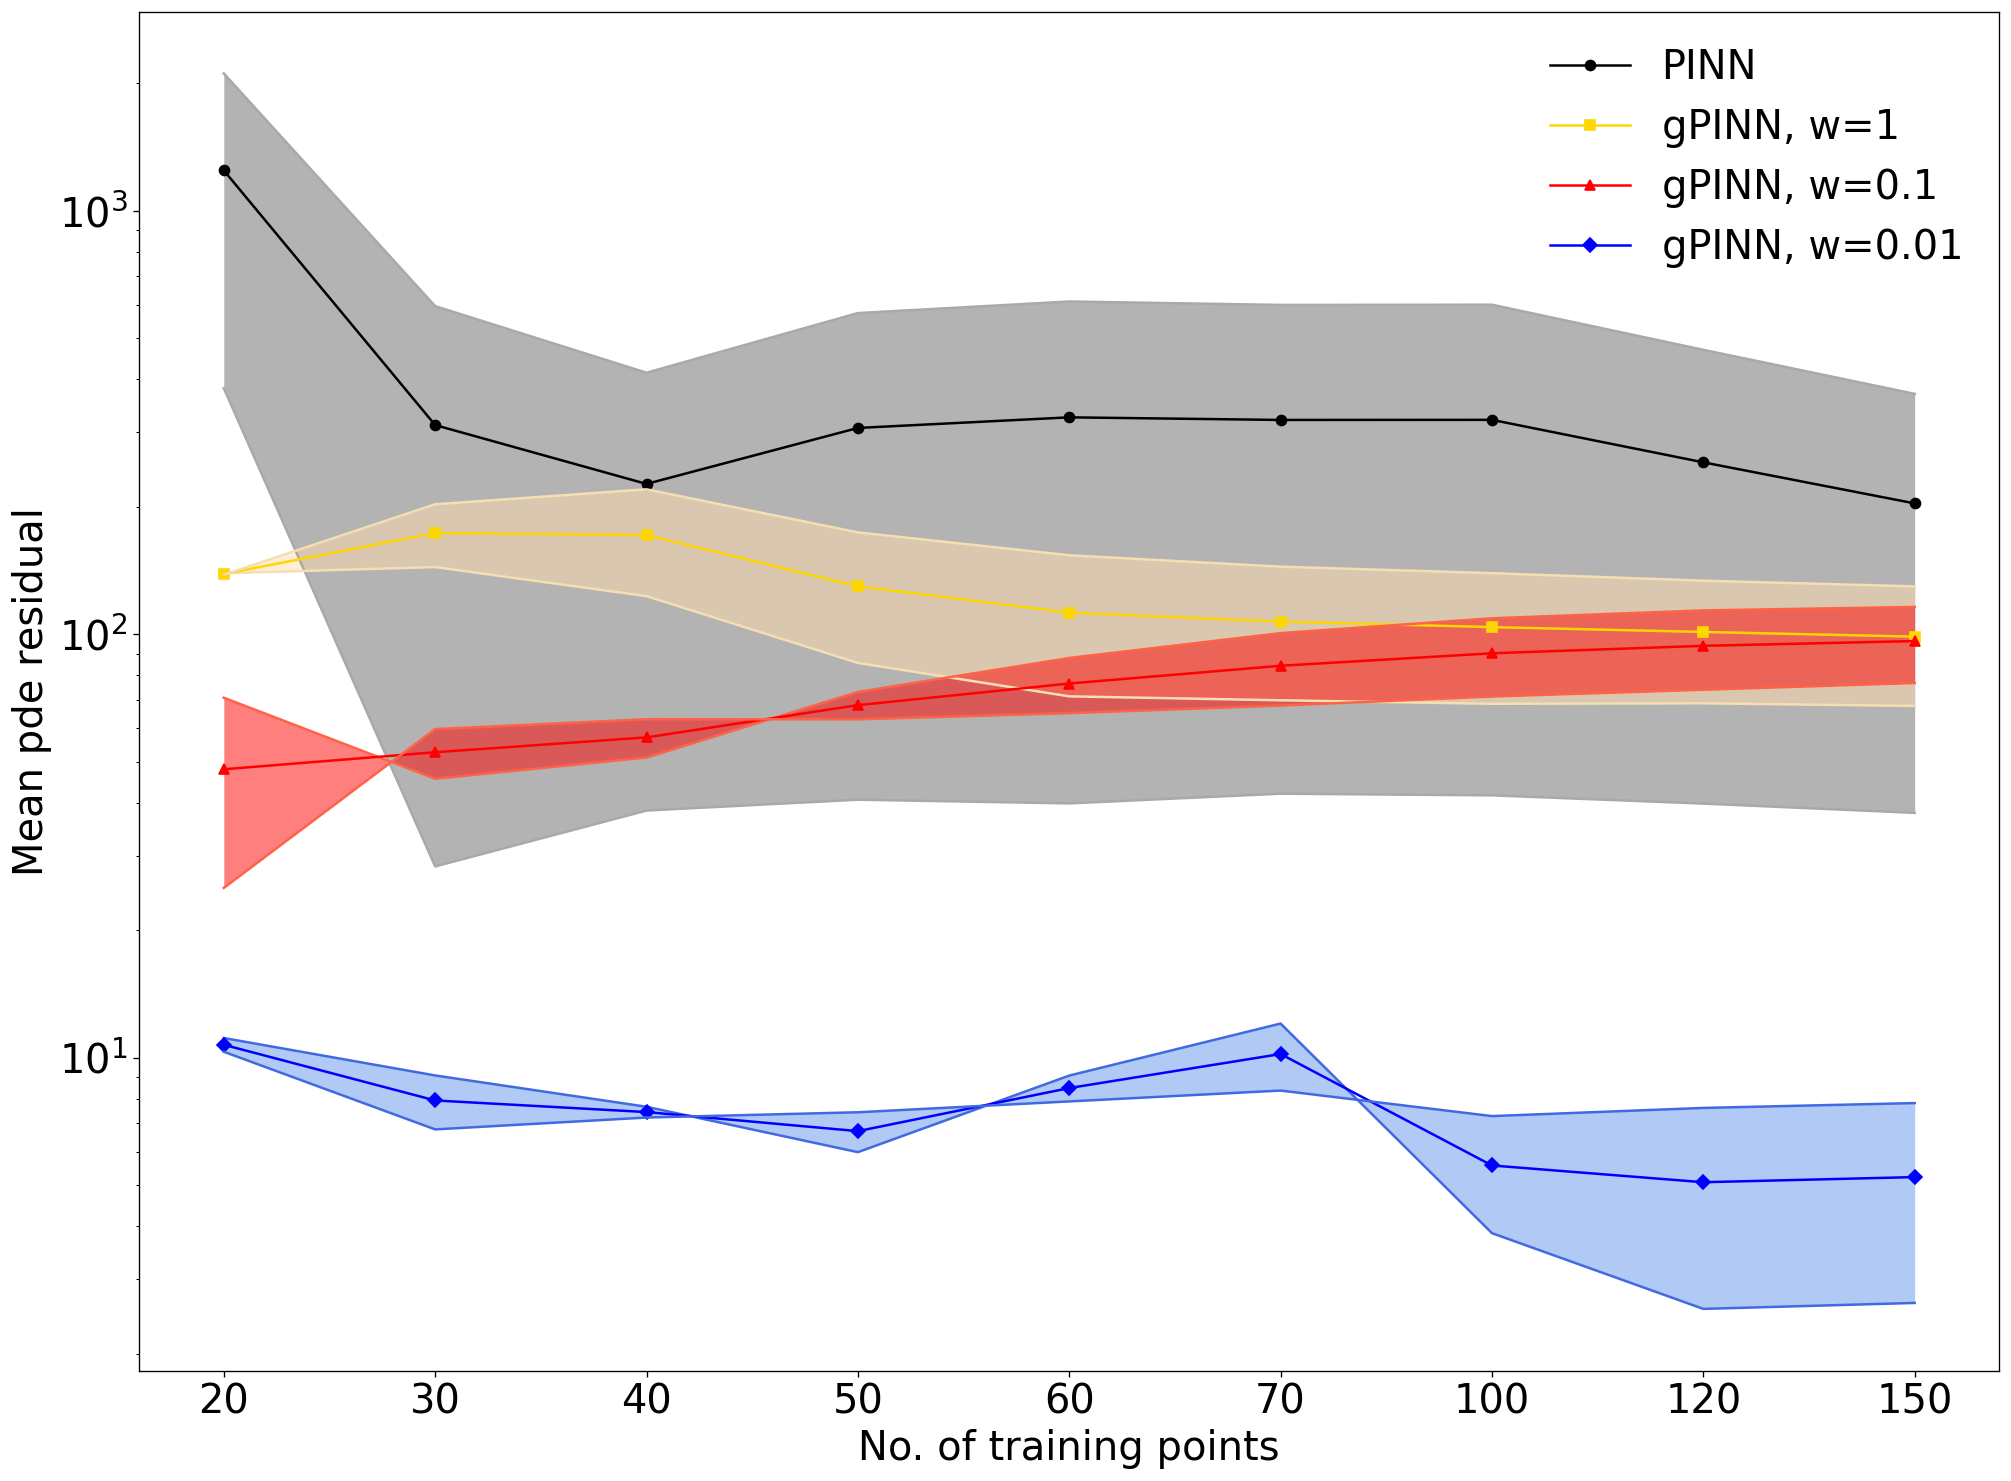

In [138]:
plot_l2_loss(x, y_nn1, y_nn2, y_gnn11, y_gnn12, y_gnn011, y_gnn012, y_gnn0011, y_gnn0012, 
             'Mean pde residual', 'No. of training points', './figure3-B')